# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [2]:
est = [('ward', AgglomerativeClustering(n_clusters=None, distance_threshold=3)),
       ('average 2', AgglomerativeClustering(n_clusters=2, linkage='average')),
       ('average 3', AgglomerativeClustering(n_clusters=3, linkage='average')),
       ('average 4', AgglomerativeClustering(n_clusters=4, linkage='average')),
       ('complete 3', AgglomerativeClustering(n_clusters=3, linkage='complete'))]   

ARI of ward: 0.43579133281242055
ARI of average 2: 0.5681159420289855
ARI of average 3: 0.7591987071071522
ARI of average 4: 0.7291485842490542
ARI of complete 3: 0.64225125183629


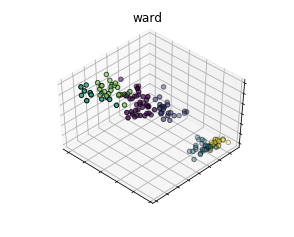

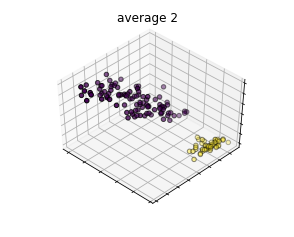

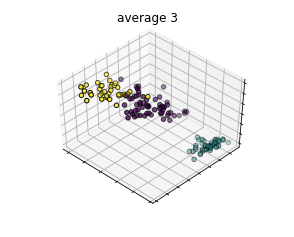

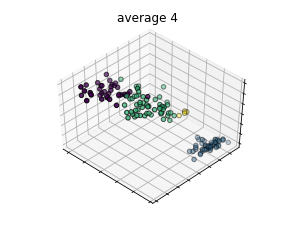

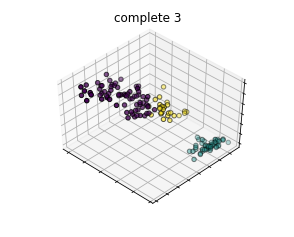

In [3]:
fignum = 1
for name, e in est:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    e.fit(X)
    lbs = e.labels_
    ax.scatter(X[:,3], X[:,0], X[:,2], c=lbs.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(name)
    ax.dist = 12
    fignum = fignum + 1
    score = adjusted_rand_score(y, lbs)
    print(f"ARI of {name}: {score}")

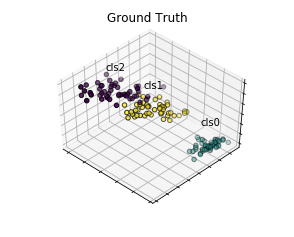

In [8]:
# Plot the ground truth
y = iris.target
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()